# CHAPTER 27: Mean-Square-error Inference

### This code runs Example 4 and plots Figure 6 in the chapter from Chapter 27: Mean-Square-Error Inference (vol II)

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

## Estimating petal length for Iris flowers

Consider the data shown in  Figure $27.6$, which represent scatter diagrams for measurements about petal and sepal dimensions for three types of iris flowers (setosa, versicolor, and virginica). The flowers are shown in Fig. $27.5$. 

 Each row in Fig. $27.6$ corresponds to one flower type and includes two plots showing the scatter diagrams for the sepal width $\times$ sepal length and petal width $\times$ petal length for the flower. There are 50 data measurements in each diagram and all dimensions are measured in centimeters. The axes in the figure are normalized to similar scales to facilitate comparison.

mean values for Iris Setosa: sepal length, sepal width, petal length, petal width
[5.006 3.428 1.462 0.246]
mean values for Iris Versicolor: sepal length, sepal width, petal length, petal width
[5.936 2.77  4.26  1.326]
mean values for Iris Virginica: sepal length, sepal width, petal length, petal width
[6.588 2.974 5.552 2.026]


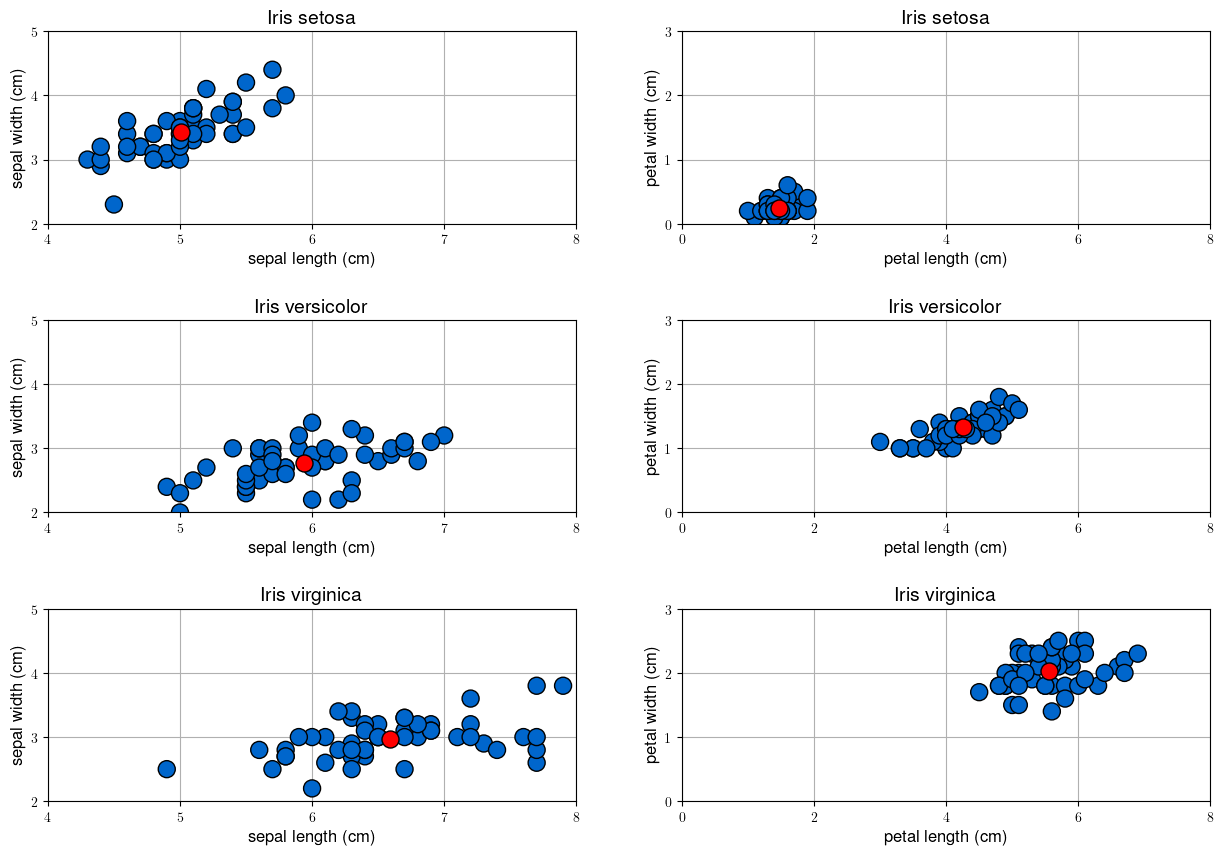

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris() # loaded into variable data
Ntotal = 150 # total number of data points
features = data['data']  # each row is a feature vector with 4 attributes (petal length, petal width, sepal length, sepal width)
labels = data['target']  # entry entry is 0=setosa, 1=versicolor, 2=virginia

# separating features by class
# class 0 (Setosa)
counter_0=0
counter_1=0
counter_2=0

features_0 = np.zeros([50, 4])
features_1 = np.zeros([50, 4])
features_2 = np.zeros([50, 4])

for n in range(Ntotal):
    if labels[n] == 0:
        features_0[counter_0,:] = features[n,:];
        counter_0=counter_0+1;
    elif labels[n] == 1:
        features_1[counter_1,:] = features[n,:];
        counter_1=counter_1+1;
    elif labels[n] == 2:
        features_2[counter_2,:] = features[n,:];
        counter_2=counter_2+1;
        
print('mean values for Iris Setosa: sepal length, sepal width, petal length, petal width')
a0= np.mean(features_0,axis=0)
print(a0)

print('mean values for Iris Versicolor: sepal length, sepal width, petal length, petal width')
a1 = np.mean(features_1,axis=0)
print(a1)

print('mean values for Iris Virginica: sepal length, sepal width, petal length, petal width')
a2 = np.mean(features_2,axis=0)
print(a2)

N3 = np.max(features_0.shape);
C3 = np.ones([N3,1]); # color map
S3 = 150*np.ones([N3,1]);

#figure 6 (sepal length x sepal width)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
fig, axs = plt.subplots(3, 2, figsize=(15, 10),gridspec_kw={'hspace': 0.5})

axs[0, 0].scatter(features_0[:,0], features_0[:,1],S3,color= (0, 0.4, 0.8),edgecolors='k', linewidth=1, zorder=2)
axs[0, 0].set_xlabel(r'sepal length (cm)', fontsize=12)
axs[0, 0].set_ylabel(r'sepal width (cm)', fontsize=12)
axs[0, 0].set_title(r'Iris setosa', fontsize=14)
axs[0, 0].grid()
axs[0, 0].set_xlim([4, 8])
axs[0, 0].set_ylim([2, 5])
axs[0, 0].scatter(a0[0],a0[1],150, color= (1, 0, 0), edgecolors='k', linewidth=1, zorder=2)
axs[0, 0].set_xticks(np.arange(4, 9, 1))
axs[0, 0].set_yticks(np.arange(2, 6, 1))

axs[0, 1].scatter(features_0[:,2], features_0[:,3],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[0, 1].set_xlabel(r'petal length (cm)', fontsize=12)
axs[0, 1].set_ylabel(r'petal width (cm)', fontsize=12)
axs[0, 1].set_title(r'Iris setosa', fontsize=14)
axs[0, 1].grid()
axs[0, 1].set_xlim([0, 8])
axs[0, 1].set_ylim([0, 3])
axs[0, 1].scatter(a0[2],a0[3],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[0, 1].set_xticks(np.arange(0, 9, 2))
axs[0, 1].set_yticks(np.arange(0, 4, 1))

axs[1, 0].scatter(features_1[:,0], features_1[:,1],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[1, 0].set_xlabel(r'sepal length (cm)', fontsize=12)
axs[1, 0].set_ylabel(r'sepal width (cm)', fontsize=12)
axs[1, 0].set_title(r'Iris versicolor', fontsize=14)
axs[1, 0].grid()
axs[1, 0].set_xlim([4, 8])
axs[1, 0].set_ylim([2, 5])
axs[1, 0].scatter(a1[0],a1[1],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[1, 0].set_xticks(np.arange(4, 9, 1))
axs[1, 0].set_yticks(np.arange(2, 6, 1))

axs[1, 1].scatter(features_1[:,2], features_1[:,3],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[1, 1].set_xlabel(r'petal length (cm)', fontsize=12)
axs[1, 1].set_ylabel(r'petal width (cm)', fontsize=12)
axs[1, 1].set_title(r'Iris versicolor', fontsize=14)
axs[1, 1].grid()
axs[1, 1].set_xlim([0, 8])
axs[1, 1].set_ylim([0, 3])
axs[1, 1].scatter(a1[2],a1[3],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[1, 1].set_xticks(np.arange(0, 9, 2))
axs[1, 1].set_yticks(np.arange(0, 4, 1))

axs[2, 0].scatter(features_2[:,0], features_2[:,1],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[2, 0].set_xlabel(r'sepal length (cm)', fontsize=12)
axs[2, 0].set_ylabel(r'sepal width (cm)', fontsize=12)
axs[2, 0].set_title(r'Iris virginica', fontsize=14)
axs[2, 0].grid()
axs[2, 0].set_xlim([4, 8])
axs[2, 0].set_ylim([2, 5])
axs[2, 0].scatter(a2[0],a2[1],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[2, 0].set_xticks(np.arange(4, 9, 1))
axs[2, 0].set_yticks(np.arange(2, 6, 1))

axs[2, 1].scatter(features_2[:,2], features_2[:,3],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[2, 1].set_xlabel(r'petal length (cm)', fontsize=12)
axs[2, 1].set_ylabel(r'petal width (cm)', fontsize=12)
axs[2, 1].set_title(r'Iris virginica', fontsize=14)
axs[2, 1].grid()
axs[2, 1].set_xlim([0, 8])
axs[2, 1].set_ylim([0, 3])
axs[2, 1].scatter(a2[2],a2[3],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[2, 1].set_xticks(np.arange(0, 9, 2))
axs[2, 1].set_yticks(np.arange(0, 4, 1))

plt.show()

Let us model the petal length of a flower as some random variable $\mathcal{x}$. Let us also model the flower type as another random variable $\mathcal{y}$, which assumes one of three discrete values: setosa, versicolor, and virginica. Given that we observe a setosa flower at random, we would like to estimate its petal length. We can do so by computing $\mathbb{E}(\mathcal{x}|\mathcal{y})$. However, we do not have any information about the conditional distribution $f_{\mathcal{x}|\mathcal{y}}(x|y)$.
<br>
<table>
  <caption><b>Average dimensions measured in centimeters for the three types of iris flowers computed from the available data measurements.</b></caption>
  <tr style="background-color: lightgray;">
    <th>Flower</th>
    <th>Sepal length</th>
    <th>Sepal width</th>
    <th>Petal length</th>
    <th>Petal width</th>
  </tr>
  <tr>
    <td>setosa</td>
    <td>5.0060</td>
    <td>3.4180</td>
    <td><b>1.4640</b></td>
    <td>0.2440</td>
  </tr>
  <tr>
    <td>versicolor</td>
    <td>5.9360</td>
    <td>2.7700</td>
    <td>4.2600</td>
    <td>1.3260</td>
  </tr>
  <tr>
    <td>virginica</td>
    <td>6.5880</td>
    <td>2.9740</td>
    <td>5.5520</td>
    <td>2.0260</td>
  </tr>
</table>
<br>
Still, we can use the available measurements to approximate $\mathbb{E}(\mathcal{x}|\mathcal{y})$ and estimate the petal length for the new setosa flower. Table $27.1$ lists the sample average values for the petal length, petal width, sepal length, and sepal width for the three types of flowers from the  available data; each graph has $50$ points. From the table we estimate for $\mathcal{y}=\text{setosa}$:
$$
\text{predicted petal length}\;=\; 1.4640\;\text{cm}\;\approx\;{\mathbb{E}(\mathcal{x}|\mathcal{y}=\text {setosa})}
$$